In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/onlinefraud.csv')
df = data.copy()
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
print(df.shape)
print(df.dtypes)

(6362620, 11)
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [5]:
print(df['isFraud'].value_counts(normalize=True))

isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


In [6]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


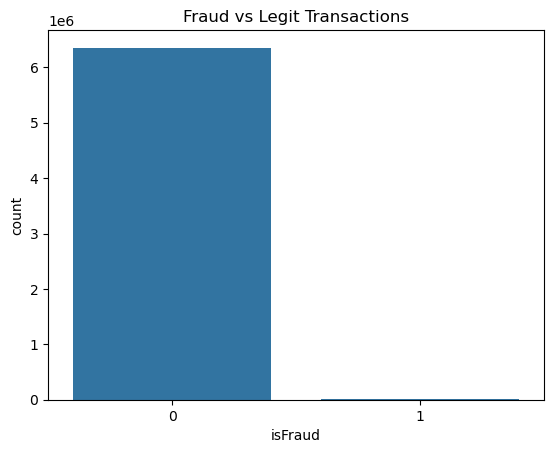

<Figure size 640x480 with 0 Axes>

In [9]:
sns.countplot(data=df, x='isFraud')
plt.title("Fraud vs Legit Transactions")
plt.show()
plt.savefig("../output/countplot.png", bbox_inches='tight', dpi=300)

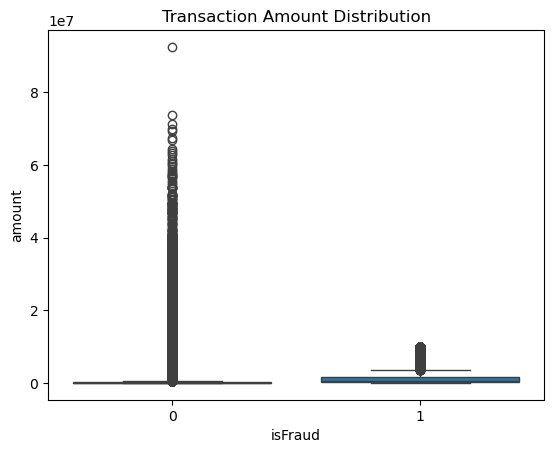

In [10]:
sns.boxplot(data=df, x='isFraud', y='amount')
plt.title("Transaction Amount Distribution")
plt.show()

In [3]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [12]:
df.isnull().sum()

step               0
type               0
amount             0
nameOrig           0
oldbalanceOrg      0
newbalanceOrig     0
nameDest           0
oldbalanceDest     0
newbalanceDest     0
isFraud            0
isFlaggedFraud     0
balanceDiffOrig    0
balanceDiffDest    0
dtype: int64

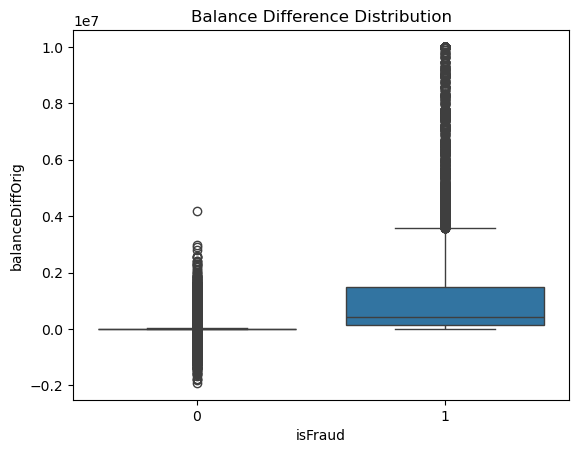

In [13]:
# boxplot balanceDiffOrig vs isFraud
sns.boxplot(data=df, x='isFraud', y='balanceDiffOrig')
plt.title("Balance Difference Distribution")
plt.show()

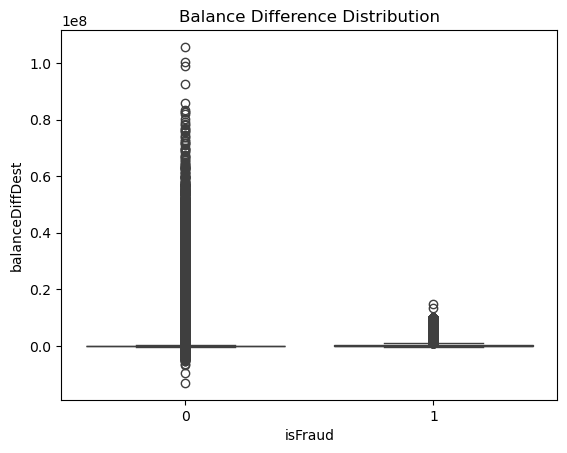

In [14]:
# balanceDiffDest vs isFraud
sns.boxplot(data=df, x='isFraud', y='balanceDiffDest')
plt.title("Balance Difference Distribution")
plt.show()


In [4]:
for col in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
    df[col] = np.log1p(df[col])

/tmp/ipykernel_182344/2872012446.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['balanceDiffOrig'])


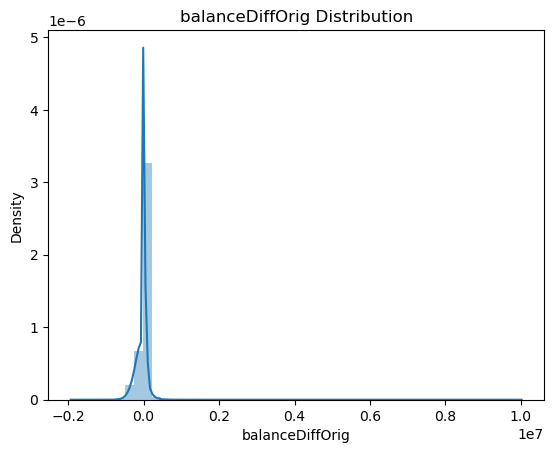

In [16]:
# Amount distribution plot
sns.distplot(df['balanceDiffOrig'])
plt.title("balanceDiffOrig Distribution")
plt.show()

/tmp/ipykernel_182344/2518503707.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['amount'])


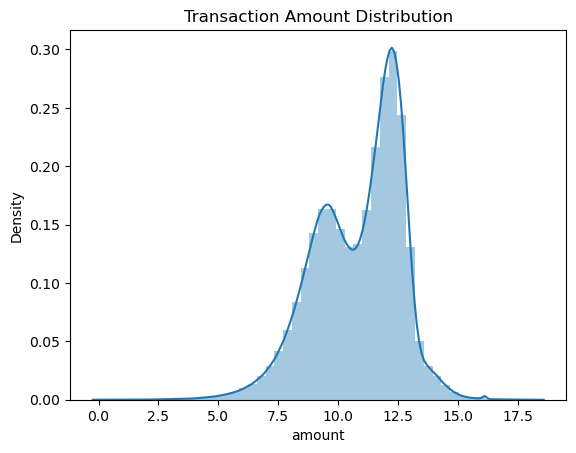

In [17]:
# Amount distribution plot
sns.distplot(df['amount'])
plt.title("Transaction Amount Distribution")
plt.show()

/tmp/ipython-input-1970578621.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['oldbalanceOrg'])


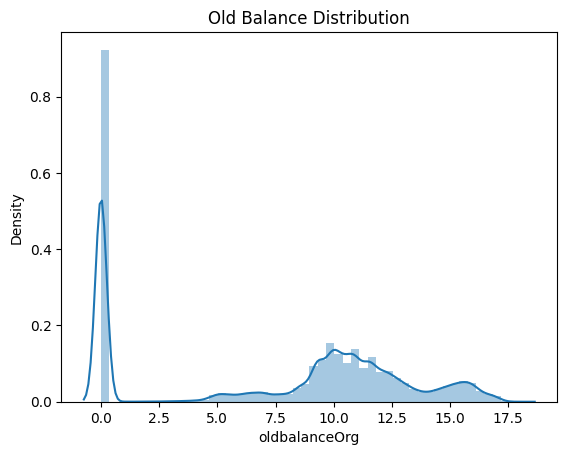

In [ ]:
# oldbalanceOrg Distribution plot
sns.distplot(df['oldbalanceOrg'])
plt.title("Old Balance Distribution")
plt.show()

/tmp/ipython-input-3613097655.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['oldbalanceDest'])


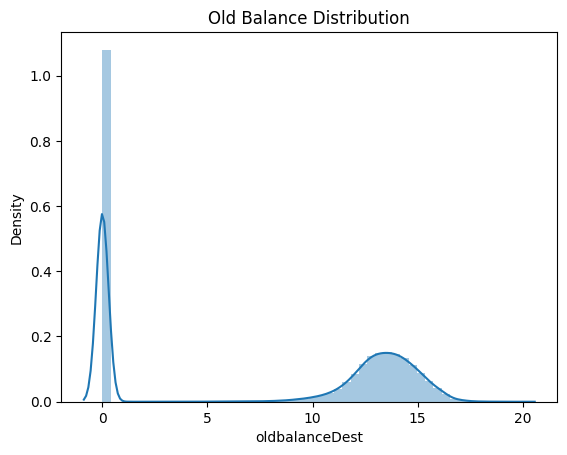

In [ ]:
# oldbalanceDest Distribution plot
sns.distplot(df['oldbalanceDest'])
plt.title("Old Balance Distribution")
plt.show()

/tmp/ipython-input-1709257881.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['newbalanceDest'])


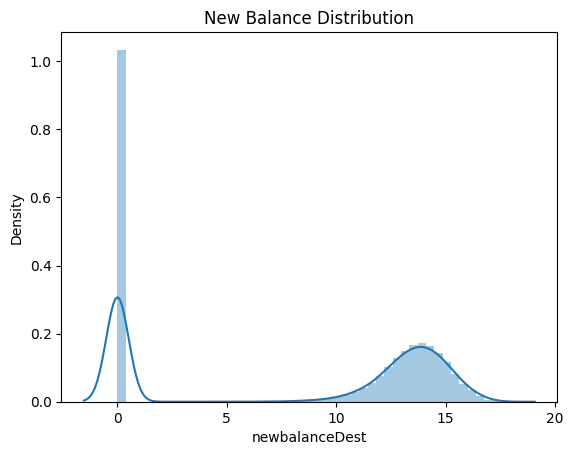

<Figure size 640x480 with 0 Axes>

In [ ]:
# newbalanceDest Distribution plot
sns.distplot(df['newbalanceDest'])
plt.title("New Balance Distribution")
plt.show()
plt.savefig("./output/dist.png", bbox_inches='tight', dpi=300)

/tmp/ipython-input-3510069572.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['newbalanceOrig'])


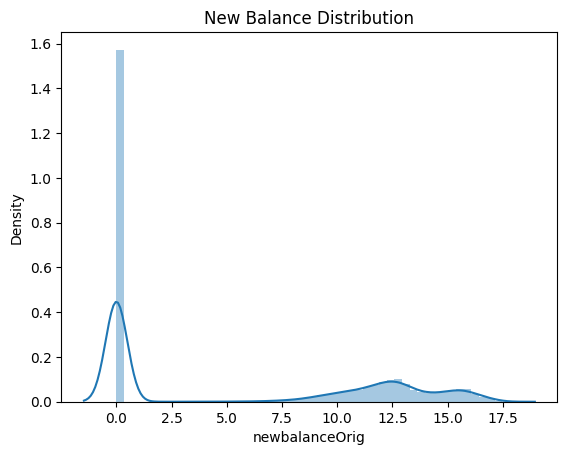

In [ ]:
# newbalanceOrg Distribution plot
sns.distplot(df['newbalanceOrig'])
plt.title("New Balance Distribution")
plt.show()

In [5]:
def extract_time_features(step: int, type: str):
  if type == "hour":
    return step % 24
  elif type == "day":
    return step // 24
  elif type == "weekend":
    return 1 if step // 24 > 4 else 0

In [6]:
df['hourOfDay'] = df['step'].apply(lambda x: extract_time_features(x, 'hour'))
df['dayOfMonth'] = df['step'].apply(lambda x: extract_time_features(x, 'day'))
df['isWeekend'] = df['step'].apply(lambda x: extract_time_features(x, 'weekend'))

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest,hourOfDay,dayOfMonth,isWeekend
0,1,PAYMENT,9.194276,C1231006815,12.044359,11.984786,M1979787155,0.000000,0.0,0,0,9839.64,0.0,1,0,0
1,1,PAYMENT,7.531166,C1666544295,9.964112,9.872292,M2044282225,0.000000,0.0,0,0,1864.28,0.0,1,0,0
2,1,TRANSFER,5.204007,C1305486145,5.204007,0.000000,C553264065,0.000000,0.0,1,0,181.00,0.0,1,0,0
3,1,CASH_OUT,5.204007,C840083671,5.204007,0.000000,C38997010,9.960954,0.0,1,0,181.00,-21182.0,1,0,0
4,1,PAYMENT,9.364703,C2048537720,10.634773,10.305174,M1230701703,0.000000,0.0,0,0,11668.14,0.0,1,0,0


In [21]:
df.isnull().sum()

step               0
type               0
amount             0
nameOrig           0
oldbalanceOrg      0
newbalanceOrig     0
nameDest           0
oldbalanceDest     0
newbalanceDest     0
isFraud            0
isFlaggedFraud     0
balanceDiffOrig    0
balanceDiffDest    0
hourOfDay          0
dayOfMonth         0
isWeekend          0
dtype: int64

In [8]:
df['origBalanceRatio'] = df['newbalanceOrig'] / (df['oldbalanceOrg'] + 1)
df['destBalanceRatio'] = df['newbalanceDest'] / (df['oldbalanceDest'] + 1)

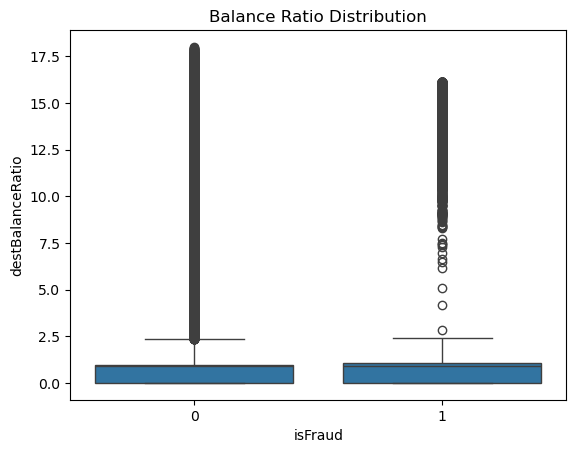

In [7]:
# origBalanceRatio vs isFraud
sns.boxplot(data=df, x='isFraud', y='destBalanceRatio')
plt.title("Balance Ratio Distribution")
plt.show()

In [9]:
df = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

df = pd.get_dummies(df, columns=['type'], drop_first=True)


In [10]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest,hourOfDay,dayOfMonth,isWeekend,origBalanceRatio,destBalanceRatio,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9.194276,12.044359,11.984786,0.000000,0.0,0,9839.64,0.0,1,0,0,0.918772,0.0,False,False,True,False
1,1,7.531166,9.964112,9.872292,0.000000,0.0,0,1864.28,0.0,1,0,0,0.900419,0.0,False,False,True,False
2,1,5.204007,5.204007,0.000000,0.000000,0.0,1,181.00,0.0,1,0,0,0.000000,0.0,False,False,False,True
3,1,5.204007,5.204007,0.000000,9.960954,0.0,1,181.00,-21182.0,1,0,0,0.000000,0.0,True,False,False,False
4,1,9.364703,10.634773,10.305174,0.000000,0.0,0,11668.14,0.0,1,0,0,0.885722,0.0,False,False,True,False


In [11]:
df = df.drop(['step'], axis=1)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

In [13]:
from sklearn.model_selection import train_test_split

# Separate features and label
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)

(5090096, 16) (1272524, 16)


In [15]:
# Use XGBOOST
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    scale_pos_weight=5,
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100
)

In [16]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [17]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.92      0.88      0.90      1643

    accuracy                           1.00   1272524
   macro avg       0.96      0.94      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524

ROC-AUC Score: 0.9997347728668828


In [18]:
# AUPRC
from sklearn.metrics import average_precision_score

print("AUPRC Score:", average_precision_score(y_test, y_pred_proba))

AUPRC Score: 0.9519038509971288


AUPRC (Average Precision): 0.9519


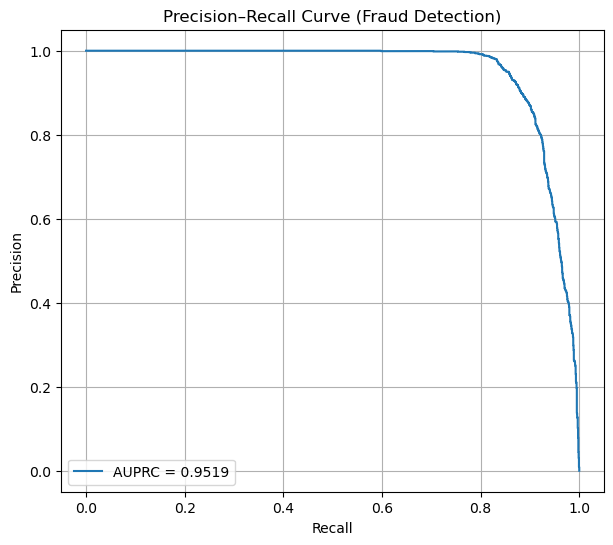

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score


# 1️⃣ Compute precision, recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# 2️⃣ Compute Area Under the Precision-Recall Curve (AUPRC)
auprc = average_precision_score(y_test, y_pred_proba)
print(f"AUPRC (Average Precision): {auprc:.4f}")

# 3️⃣ Plot the Precision–Recall curve
plt.figure(figsize=(7, 6))
plt.plot(recall, precision, label=f"AUPRC = {auprc:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Fraud Detection)")
plt.legend()
plt.grid(True)
plt.show()


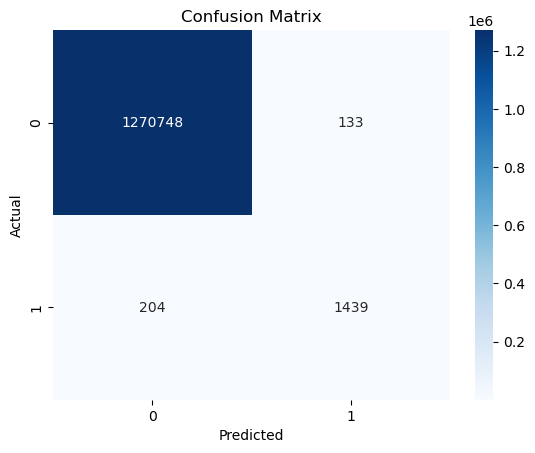

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<Figure size 1000x600 with 0 Axes>

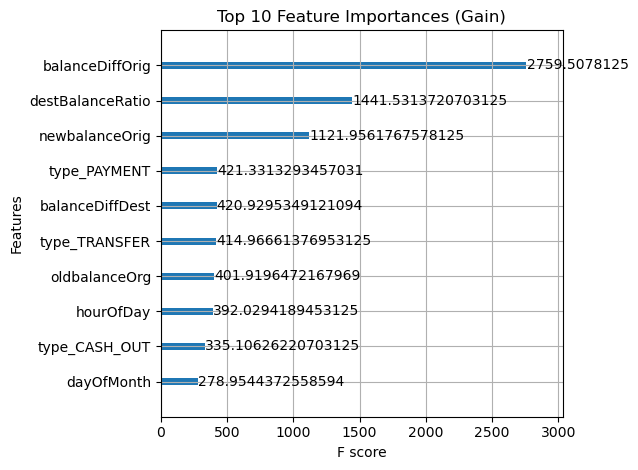

In [20]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances (Gain)")
plt.tight_layout()
plt.show()

In [21]:
X_test_df = pd.DataFrame(X_test, columns=X.columns)
sample = X_test_df.sample(100, random_state=42)

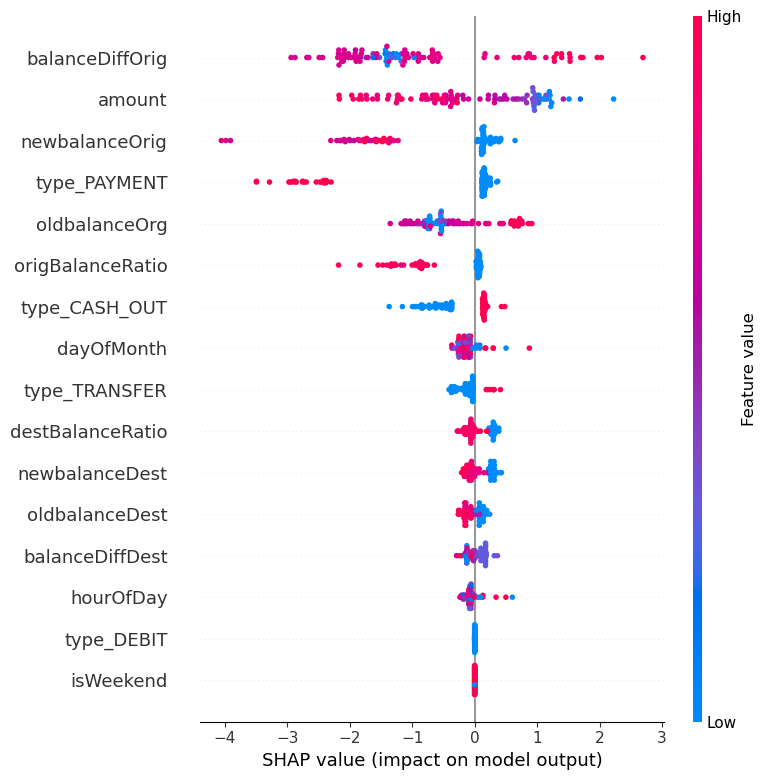

In [22]:
import shap

explainer = shap.TreeExplainer(xgb_model)

# Get SHAP values
shap_values = explainer.shap_values(sample)

# Summary plot
shap.summary_plot(shap_values, sample)


In [23]:
import sys, os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)
from app.preprocess import FeatureEngineer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Columns
numeric_features = [
    "hourOfDay", "dayOfMonth", "isWeekend", "amount", "oldbalanceOrg", "newbalanceOrig",
    "oldbalanceDest", "newbalanceDest",
    "balanceDiffOrig", "balanceDiffDest",
    "origBalanceRatio", "destBalanceRatio"
]
categorical_features = ["type"]

preprocessor = Pipeline([
    ("engineer", FeatureEngineer()),
    ("encode", ColumnTransformer([
        ("type", OneHotEncoder(handle_unknown="ignore"), ["type"])
    ], remainder="passthrough"))
])

model_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", xgb_model)
])

In [24]:
X = data.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = data['isFraud']

In [25]:
model_pipeline.fit(X, y)

/home/dosu/anaconda3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('engineer', FeatureEngineer()),
                                 ('encode',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('type',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['type'])]))])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=Non...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [26]:
joblib.dump(model_pipeline, '../model/fraud_model_pipeline_v2.pkl')

['../model/fraud_model_pipeline_v2.pkl']